# Project discrete optimization: a walk to the park

*Selected Topics in Mathematical Optimization: 2017-2018*

**Michiel Stock** ([email](michiel.stock@ugent.be))

![](Figures/logo.png)

YOUR NAME(S) HERE

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

blue = '#264653'
green = '#2a9d8f'
yellow = '#e9c46a'
orange = '#f4a261'
red = '#e76f51'
black = '#50514F'
grey = '#ededed'

In this project we will study a fictitious city (you can imagine it to be the capital of your favourite fantasy setting). A map of this city is given below.

![A city with streets and parks.](Figures/city_map.png)

Every point on this map is a crossing, and every grey line is a street between two crossings. Every street is a straight line and the length of the street is just the Euclidean distance between the two crossings.

This city also has some parks, indicated in green:

- **park A** at the top left corner;
- **park B** on the right, traversing top to bottom;
- **park C**, the little circular region in the middle.

This city can be represented as a weighted graph. Every vertex has an integer identifier and is associated with an $x,y$ coordinate. We have also three lists containing the indices of the vertices lying in the parks.

In [30]:
with open('Data/city.json', 'r') as fh:
    city = json.load(fh)
    
edges = list(map(tuple, city['edges']))
coordinates = city['coordinates']
vertices = list(city['vertices'])

park_A = city['parks']['A']
park_B = city['parks']['B']
park_C = city['parks']['C']

The main research question of this project is:

> What is the shortest path from *any* vertex to a vertex in a park?

As a first heuristic, we can use the minimum spanning tree on the graph. As seen in the theory, this is the tree tree that connects all vertices and has the lowest cost. From this tree, there is a single path from every edge to every other edge.

In a second step, we will use shortest path algorithms to find the true shortest path for every vertex.

**ASSIGNMENTS**

1. Find the minimum spanning tree for this graph.
    - Make a plot of the minimum spanning tree for this graph.
    - Compute the distance from any vertex on the minimum spanning tree to the closest vertex lying in a park.
    - Make a histogram of these distances (remove distances equal to zero, i.e. from vertices already in a park).
2. Compute the shortest distances from any vertex to the closest vertex (note that all shortest paths together will be a forest).
    - Implement this in an efficient way, **not** by using A* in a for-loop!
    - Show your solution on a plot, color the vertices according to the distances to the closest park and add arrows to indicate which vertex to take.
    - Show for every vertex whether park A, B or C is the closest.
    - Make a histogram of these distances (remove distances equal to zero, i.e. from vertices already in a park). Compare with the minimum spanning tree.

Some guidelines for completing this project:

- Write clear code with human-readable names and comments where needed. Add a (basic) docstring to all your functions.
- Make clear figures with ax labels, titles etc.
- Always provide some interpretation of the results.
- You **can** recycle and modify code from earlier chapters or other sources. Clearly indicate where you obtained this code from (you can add a hyperlink to the original source).

Finally, some hints that can help you do this project efficiently:

- Carefully read all assignments, assignment 1 and 2 essentially ask the same thing.
- The shortest path from vertex A to vertex B is the same as from vertex B to vertex A.
- If vertex C is on the shortest path from vertex A to vertex B, then you also found the shortest path from vertex C to vertex B. 

## The data

## assignment 1: minimum spanning tree

### functions

In [49]:
import heapq
import itertools

prims algorithm

In [32]:
def prim(vertices, edges, start, add_weights=False):
    """
    Prim's algorithm for finding a minimum spanning tree.

    Inputs :
        - vertices : a set of the vertices of the Graph
        - edges : a list of weighted edges (e.g. (0.7, 'A', 'B') for an
                    edge from node A to node B with weigth 0.7)
        - start : an edge to start with

    Output:
        - edges : a minumum spanning tree represented as a list of edges
        - total_cost : total cost of the tree
    """
    adj_list = edges_to_adj_list(edges)
    # list of tuples describing the edges starting from the start
    # vertix, with weights, i.e. the candidate edges
    to_check = [(w, start, v_new) for w, v_new in adj_list[start]]
    # heapify the list (~sorting)
    heapq.heapify(to_check)
    # for every node connected to the
    #dist_to_mst = {i : (w, start) for w, i in adj_list.pop(start)}
    mst_edges = []
    mst_vertices = set([start])
    total_cost = 0
    while to_check:
        # get the edge with the lowest cost connected to the vertix
        cost, v_in_mst, v_new = heapq.heappop(to_check)
        # check if the vertex is not in the current list of vertices
        # aka the path that is constructed
        if v_new not in mst_vertices:
            # if not, add to mst
            if add_weights:
                mst_edges.append((cost, v_in_mst, v_new))
            else:
                mst_edges.append((v_in_mst, v_new))
            mst_vertices.add(v_new)
            total_cost += cost
            # update the heap with candidate edges: adding the edges starting
            # from the newly added vertix
            for cost, v in adj_list[v_new]:
                heapq.heappush(to_check, (cost, v_new, v))    
    return mst_edges, total_cost

In [33]:
def edges_to_adj_list(edges):
    """
    Turns a list of edges in an adjecency list (implemented as a list).
    Edges don't have to be doubled, will automatically be symmetric

    Input:
        - edges : a list of weighted edges (e.g. (0.7, 'A', 'B') for an
                    edge from node A to node B with weigth 0.7)

    Output:
        - adj_list : a dict of a set of weighted edges
    """
    adj_list = {}
    for w, i, j in edges:
        for v in (i, j):
            if v not in adj_list:
                adj_list[v] = set([])
        adj_list[i].add((w, j))
        adj_list[j].add((w, i))
    return adj_list

### treesolution

In [34]:
start = vertices[0]
mst_edges, total_cost = prim(vertices, edges, start)

(0, 150)

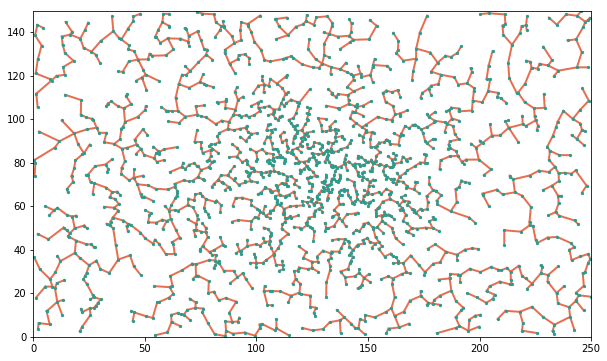

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
X = np.array(coordinates)
# plot with links
ax.scatter(X[:,0], X[:,1], s=5, color=green, zorder=2)
for i, j in mst_edges:
    ax.plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], color=red, zorder=1, lw=2)
ax.set_xlim(0,250)
ax.set_ylim(0,150)

## shortest path to park

### functions

In [36]:
# functions for computing distances
manhattan_distance = lambda x, y : sum([abs(xi - yi) for xi, yi in zip(coordinates[x], coordinates[y])])
euclidean_distance = lambda x, y : sum([(xi - yi)**2 for xi, yi in zip(coordinates[x], coordinates[y])])**0.5

In [37]:
def a_star(graph, source, sink, heuristic):
    """
    Implementation of the A* shortest path algorithm
    Inputs:
        - graph : dict representing the graph
        - source : the source node
        - sink : the sink node (optional)
        - heuristic : a function with the heuristic for the shortest path between two nodes
    Ouput:
        - distance : dict with the distances of the nodes to the source
        - came_from : dict with for each node the previous node in the shortest
                    path from the source
    """
    distance = {v : np.inf for v in graph.keys()}
    # vertices_to_check is a heap containing the estimated distance
    # of a given node to a source
    vertices_to_check = [(heuristic(source, sink), source)]
    previous = {}

    distance[source] = 0

    while vertices_to_check:
        heuristic_dist, current = heapq.heappop(vertices_to_check)
        if current == sink:
            return reconstruct_path(previous, source, sink), distance[sink]
        for dist_current_neighbor, neighbor in graph[current]:
            new_dist_from_source = distance[current] + dist_current_neighbor
            if new_dist_from_source < distance[neighbor]:
                distance[neighbor] = new_dist_from_source
                min_dist_neighbor_source = distance[neighbor] +\
                        heuristic(neighbor, sink)
                heapq.heappush(vertices_to_check, (min_dist_neighbor_source, neighbor))
                previous[neighbor] = current

In [38]:
def reconstruct_path(previous, source, sink):
    """
    Reconstruct the path from the output of the Dijkstra algorithm.

    Inputs:
            - previous : a dict with the previous node in the path
            - source : the source node
            - sink : the sink node
    Ouput:
            - the shortest path from source to sink
    """
    if sink not in previous:
        return []
    # V := sink   \\ path is reconstructed backwards
    v = sink
    # path := [V]  \\ path is a list of nodes
    path = [v]
    # while V is not source
    while v is not source:
        # V := previous node in path
        v = previous[v]
        # add V in beginning of the path
        path = [v] + path
    return path

In [39]:
def add_path(path, ax, color=red):
    """
    Add a path to an ax
    """
    for i in range(len(path)-1):
        i1, j1 = coordinates[path[i]]
        i2, j2 = coordinates[path[i+1]]
        ax.plot([i1, i2], [j1, j2], c=color, lw=2)


### solution

#### test shortest path

In [40]:
#%%timeit
graph = edges_to_adj_list(edges)
path_astar, length_astar = a_star(graph, source=500, sink=1000, heuristic=euclidean_distance)

(0, 150)

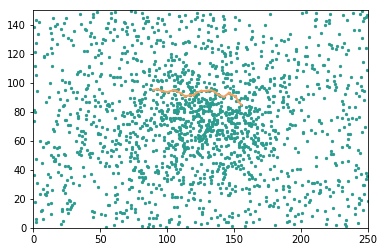

In [41]:
fig, ax = plt.subplots()
X = np.array(coordinates)
# plot with links
ax.scatter(X[:,0], X[:,1], s=5, color=green, zorder=2)
add_path(path_astar, ax, orange)
ax.set_xlim(0,250)
ax.set_ylim(0,150)

#### get vertices on the edges of the park

In [42]:
def get_vertices_at_edge_park(vertices_park):
    # edges with only one vertex in the park:
    # edges going in or out of the park
    _filter = [(i[1] in vertices_park) ^ (i[2] in vertices_park) for i in edges]
    # filter list of edges with boolean list
    edges_park = list(itertools.compress(edges, _filter))
    # no distances needed, so remove them
    edges_park_nodistance = [(i[1], i[2]) for i in edges_park]
    # get vertices of the edges going in or out of the park
    vertices_edges_park = np.unique(edges_park_nodistance)
    # slice to have only the vertices inside the park
    return vertices_edges_park[np.isin(vertices_edges_park, vertices_park)]

In [50]:
vertices_edges_park = get_vertices_at_edge_park(park_A + park_B + park_C)

(0, 150)

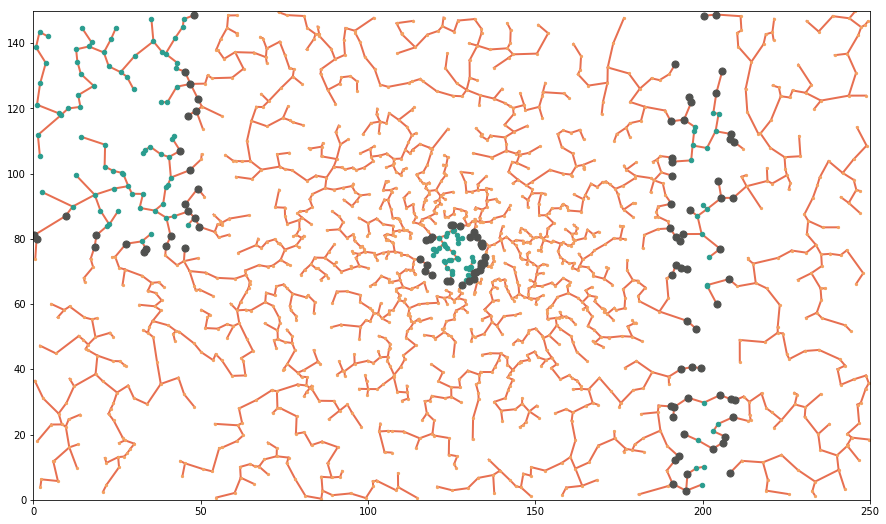

In [51]:
fig, ax = plt.subplots(figsize=(15,9))
X = np.array(coordinates)
# plot with links
ax.scatter(X[:,0], X[:,1], s=5, color=orange, zorder=2)
# plot parks
allparks = park_A + park_B + park_C
ax.scatter(X[allparks,0], X[allparks,1], s=20, color=green, zorder=2)
# plot vertices at edge of parks
ax.scatter(X[vertices_edges_park,0], X[vertices_edges_park,1], s=50, color=black, zorder=2)

for i, j in mst_edges:
    ax.plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], color=red, zorder=1, lw=2)

ax.set_xlim(0,250)
ax.set_ylim(0,150)

#### DERP

In [130]:
def find_closest_park_vertice(vertice, vertices_park_edge, dist_measure):
    distance_lst = dist_measure(vertice,vertices_park_edge)
    mn,idx = min((distance_lst[i],i) for i in xrange(len(distance_lst)))
    return idx

def compute_shortest_path(graph, graph_noparknodes, park_edge_vertices):
    graph_queu = graph_noparknodes.copy()
    shortestpaths = {}
    niter = 0
    while (len(list(graph_queu.keys()))) and (niter < 10000):
        max_length = 1e10
        path_list = []
        source = list(graph_queu.keys())[0]
        for park_edge_vertex in park_edge_vertices:
            temp_path_astar, temp_length_astar = path_ = a_star(graph=graph, source=source, sink=park_edge_vertex, heuristic=euclidean_distance)
            if temp_length_astar < max_length:
                path_list = temp_path_astar
                max_length = temp_length_astar
        
        shortestpaths[source]=path_list
        del graph_queu[source]
        
        path_list_rev = path_list[::-1]
        while path_list_rev:
            vertex = path_list_rev.pop()
            if vertex in graph_queu.keys():
                shortestpaths[vertex]=path_list_rev[::-1]
                del graph_queu[vertex]
        
        # delete all nodes
        #map(lambda i: graph_queu.pop(i), path_list)
        #__ = [graph_queu.pop(i) for i in path_list]
        #__ = graph_queu.pop(source)
        
        niter += 1
        print('iteration ' +str(niter) + ' of ' + str(len(graph_queu)))
    return shortestpaths

In [80]:
graph = edges_to_adj_list(edges)
graph_noparknodes = graph.copy()
# doesn't work for some magical reason
#map(lambda i: graph_noparknodes.pop(i), park_A + park_B + park_C)
__ = [graph_noparknodes.pop(i) for i in park_A + park_B + park_C]

In [81]:
graph[0]

{(1.1401317745764785, 411),
 (4.255690842061998, 407),
 (6.491629119854974, 950),
 (6.75132437649784, 640),
 (7.4324301674604865, 27)}

In [131]:
shortestpaths = compute_shortest_path(graph,graph_noparknodes, vertices_edges_park)

iteration 1 of 1501
iteration 2 of 1500
iteration 3 of 1494
iteration 4 of 1488
iteration 5 of 1482
iteration 6 of 1481
iteration 7 of 1473
iteration 8 of 1472
iteration 9 of 1461
iteration 10 of 1458
iteration 11 of 1450
iteration 12 of 1449
iteration 13 of 1440
iteration 14 of 1439
iteration 15 of 1434
iteration 16 of 1433
iteration 17 of 1432
iteration 18 of 1429
iteration 19 of 1423
iteration 20 of 1421
iteration 21 of 1415
iteration 22 of 1413
iteration 23 of 1410
iteration 24 of 1409
iteration 25 of 1406
iteration 26 of 1405
iteration 27 of 1403
iteration 28 of 1402
iteration 29 of 1392
iteration 30 of 1386
iteration 31 of 1385
iteration 32 of 1377
iteration 33 of 1375
iteration 34 of 1374
iteration 35 of 1373
iteration 36 of 1366
iteration 37 of 1365
iteration 38 of 1360
iteration 39 of 1359
iteration 40 of 1355
iteration 41 of 1354
iteration 42 of 1353
iteration 43 of 1351
iteration 44 of 1350
iteration 45 of 1343
iteration 46 of 1341
iteration 47 of 1337
iteration 48 of 1336
i

iteration 389 of 608
iteration 390 of 607
iteration 391 of 606
iteration 392 of 605
iteration 393 of 602
iteration 394 of 601
iteration 395 of 599
iteration 396 of 598
iteration 397 of 597
iteration 398 of 594
iteration 399 of 593
iteration 400 of 592
iteration 401 of 591
iteration 402 of 590
iteration 403 of 589
iteration 404 of 588
iteration 405 of 587
iteration 406 of 586
iteration 407 of 585
iteration 408 of 584
iteration 409 of 583
iteration 410 of 582
iteration 411 of 580
iteration 412 of 577
iteration 413 of 576
iteration 414 of 573
iteration 415 of 572
iteration 416 of 570
iteration 417 of 565
iteration 418 of 563
iteration 419 of 562
iteration 420 of 561
iteration 421 of 558
iteration 422 of 557
iteration 423 of 556
iteration 424 of 554
iteration 425 of 553
iteration 426 of 552
iteration 427 of 551
iteration 428 of 550
iteration 429 of 549
iteration 430 of 548
iteration 431 of 547
iteration 432 of 544
iteration 433 of 543
iteration 434 of 542
iteration 435 of 541
iteration 436

iteration 781 of 140
iteration 782 of 139
iteration 783 of 138
iteration 784 of 137
iteration 785 of 136
iteration 786 of 135
iteration 787 of 134
iteration 788 of 133
iteration 789 of 132
iteration 790 of 131
iteration 791 of 129
iteration 792 of 128
iteration 793 of 127
iteration 794 of 126
iteration 795 of 125
iteration 796 of 124
iteration 797 of 123
iteration 798 of 122
iteration 799 of 121
iteration 800 of 120
iteration 801 of 119
iteration 802 of 118
iteration 803 of 117
iteration 804 of 116
iteration 805 of 115
iteration 806 of 114
iteration 807 of 113
iteration 808 of 112
iteration 809 of 111
iteration 810 of 110
iteration 811 of 108
iteration 812 of 107
iteration 813 of 106
iteration 814 of 105
iteration 815 of 104
iteration 816 of 103
iteration 817 of 102
iteration 818 of 101
iteration 819 of 100
iteration 820 of 99
iteration 821 of 98
iteration 822 of 97
iteration 823 of 96
iteration 824 of 95
iteration 825 of 94
iteration 826 of 93
iteration 827 of 92
iteration 828 of 91
i

In [158]:
graph_noparknodes[1414]

{(0.5947600800339496, 1618),
 (1.0540374734192053, 1145),
 (2.500104162987919, 1119),
 (2.747765222362817, 1555),
 (3.321412113799266, 1250),
 (3.5897084599081195, 1712),
 (3.605836367620891, 850)}

(0, 150)

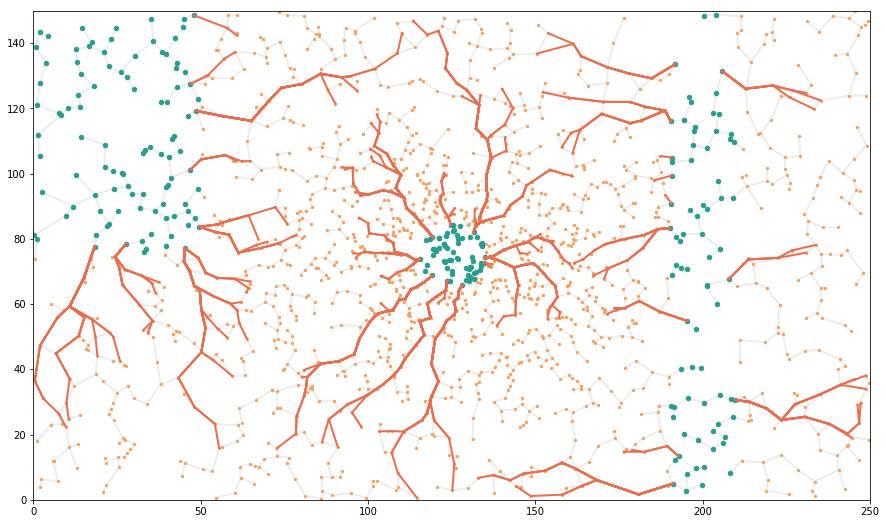

In [132]:
fig, ax = plt.subplots(figsize=(15,9))
X = np.array(coordinates)
# plot with links
ax.scatter(X[:,0], X[:,1], s=5, color=orange, zorder=2)
# plot parks
allparks = park_A + park_B + park_C
ax.scatter(X[allparks,0], X[allparks,1], s=20, color=green, zorder=2)

# plot edges
for i, j in mst_edges:
    ax.plot([X[i,0], X[j,0]], [X[i,1], X[j,1]], color=grey, zorder=1, lw=2)

#for key in shortestpaths[]:

for key in list(shortestpaths.keys())[:400]:
    add_path(shortestpaths[key], ax, red)
    
ax.set_xlim(0,250)
ax.set_ylim(0,150)